Import Libraries

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Read Dataset

In [71]:
df=pd.read_csv('data/stud.csv')

In [72]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [73]:
df.shape

(1000, 8)

Steps to do:
Datacheck
1.Check Missing values
2.Check Duplicates
3.Check data type
4.Check the number of unique values of each column
5.Check statistics of data set
6.Check various categories present in the different categorical column

In [74]:
df.isna().sum()#there is no missing value in this dataset

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [75]:
df.duplicated().sum()#there is no duplicate value in this dataset

0

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [77]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [78]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring Data

In [79]:
print("Categories in gender:",end=" ")
print(df['gender'].unique())

print("Categories in rece_ethinicity:",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental level of education:",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch:",end=" ")
print(df['lunch'].unique())

print("Categories in test preperation course:",end=" ")
print(df['test_preparation_course'].unique())

Categories in gender: ['female' 'male']
Categories in rece_ethinicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch: ['standard' 'free/reduced']
Categories in test preperation course: ['none' 'completed']


In [80]:
#define numerical and categorical variables
numerical_variables=[features for features in df.columns if df[features].dtype!='O']
categorical_variables=[features for features in df.columns if df[features].dtype=='O']

print("We have {} no. of numercal features:{}".format(len(numerical_variables),numerical_variables))
print("We have {} no. of categorical features:{}".format(len(categorical_variables),categorical_variables))

We have 3 no. of numercal features:['math_score', 'reading_score', 'writing_score']
We have 5 no. of categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Feature Engineering

In [81]:
#Adding columns for total score and average
df['total']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total']/3

In [82]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [83]:
reading_full=df[df['reading_score']==100]['average'].count()
print("Number of students with full marks in reading:{}".format(reading_full))
math_full=df[df['math_score']==100]['average'].count()
print("Number of students with full marks in maths:{}".format(math_full))
wrting_full=df[df['writing_score']==100]['average'].count()
print("Number of students with full marks in writing:{}".format(writing_full))

Number of students with full marks in reading:17
Number of students with full marks in maths:7
Number of students with full marks in writing:14


In [84]:
reading_lessthan20=df[df['reading_score']<=20]['average'].count()
print("Number of students with less than 20 marks in reading:{}".format(reading_lessthan20))
math_lessthan20=df[df['math_score']<=20]['average'].count()
print("Number of students with less than 20 marks in maths:{}".format(math_lessthan20))
writing_lessthan20=df[df['writing_score']<=20]['average'].count()
print("Number of students with less than 20 marks in writing:{}".format(writing_lessthan20))

Number of students with less than 20 marks in reading:1
Number of students with less than 20 marks in maths:4
Number of students with less than 20 marks in writing:3


We can observe from above that more students performed bad in maths and good in reading

Exploring Data:
1.Histogram
2.Kernal Distribution Function

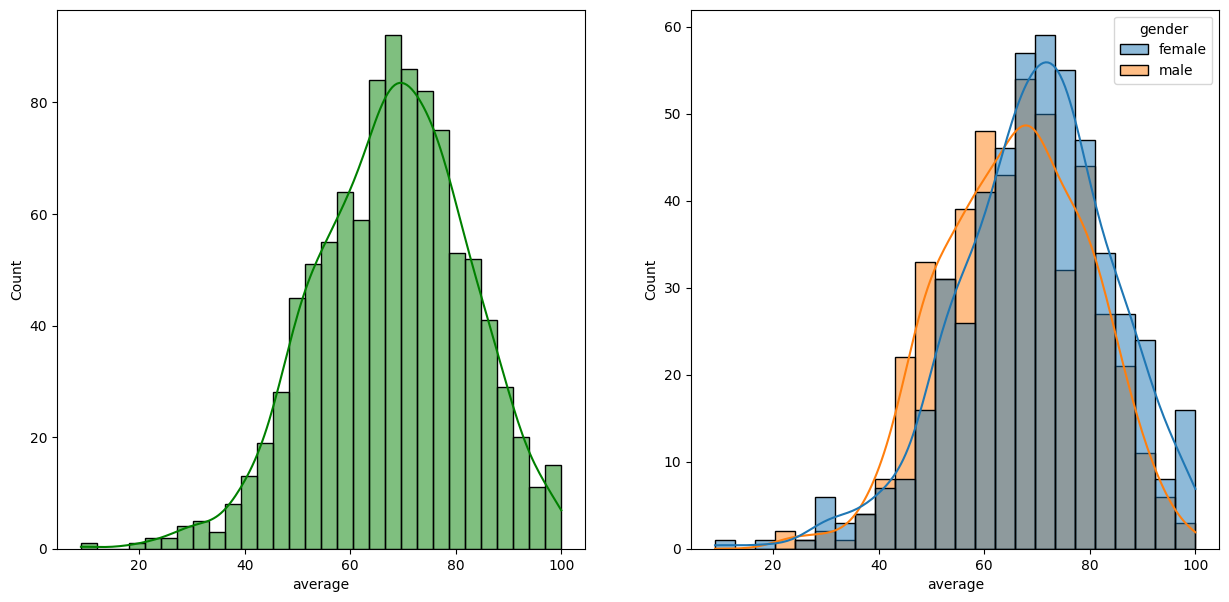

In [85]:
#Female students tend to perform well then male students.
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

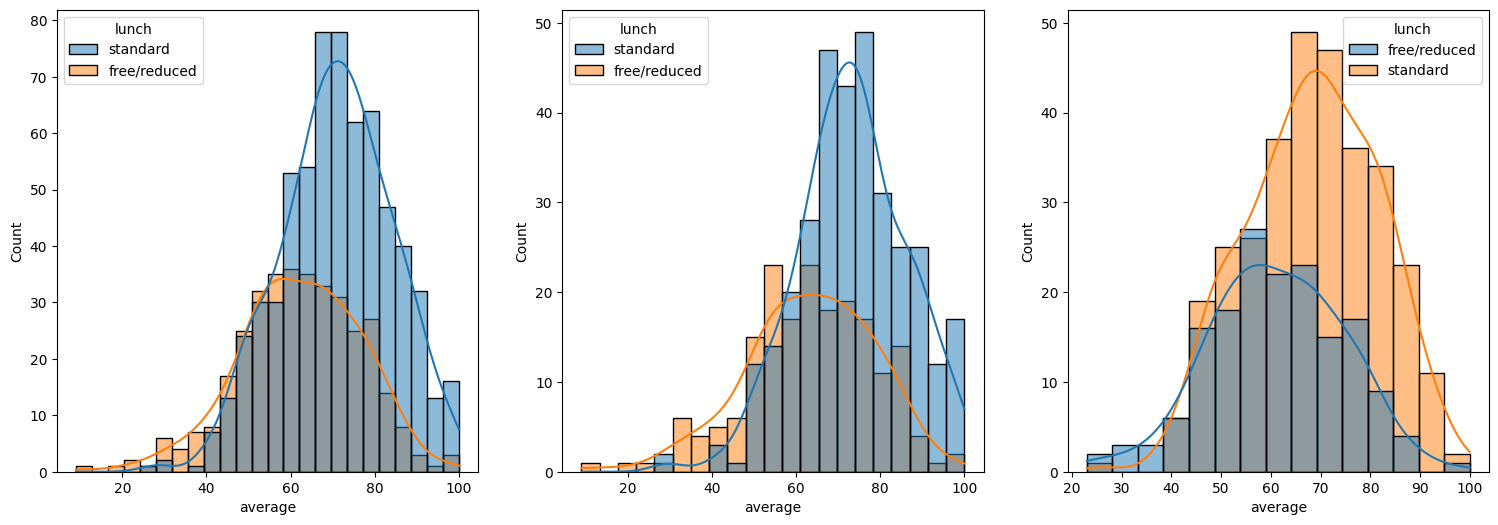

In [86]:
#standard lunch performs well in exam
fig, axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

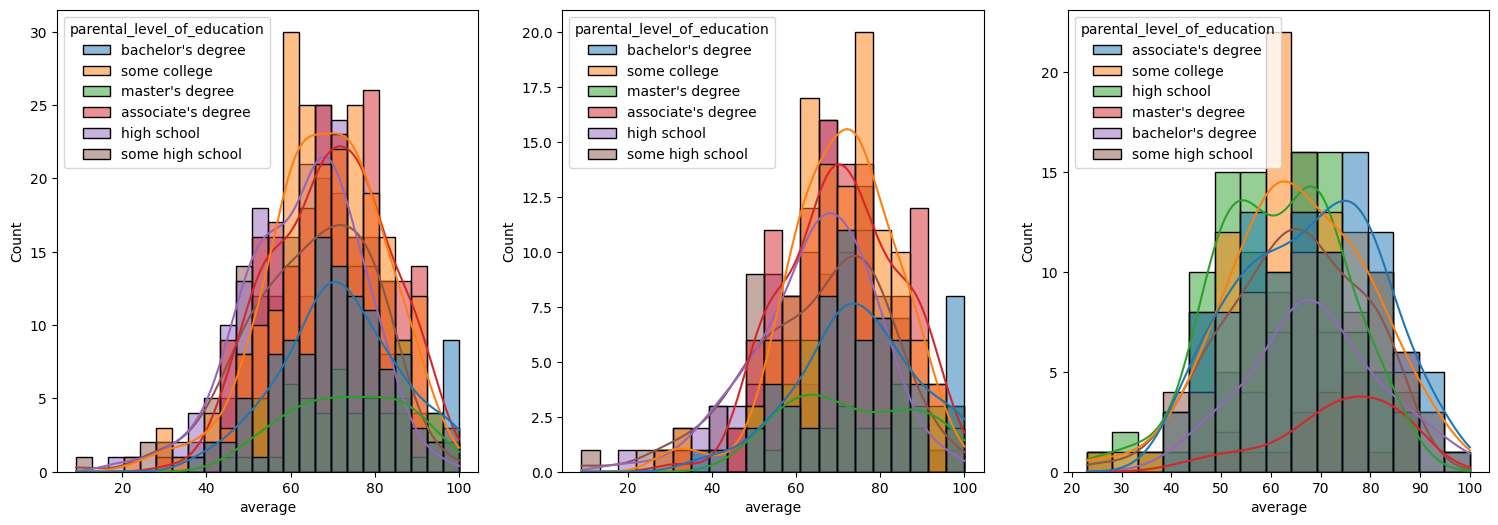

In [87]:
#not very significant on childs education
fig, axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

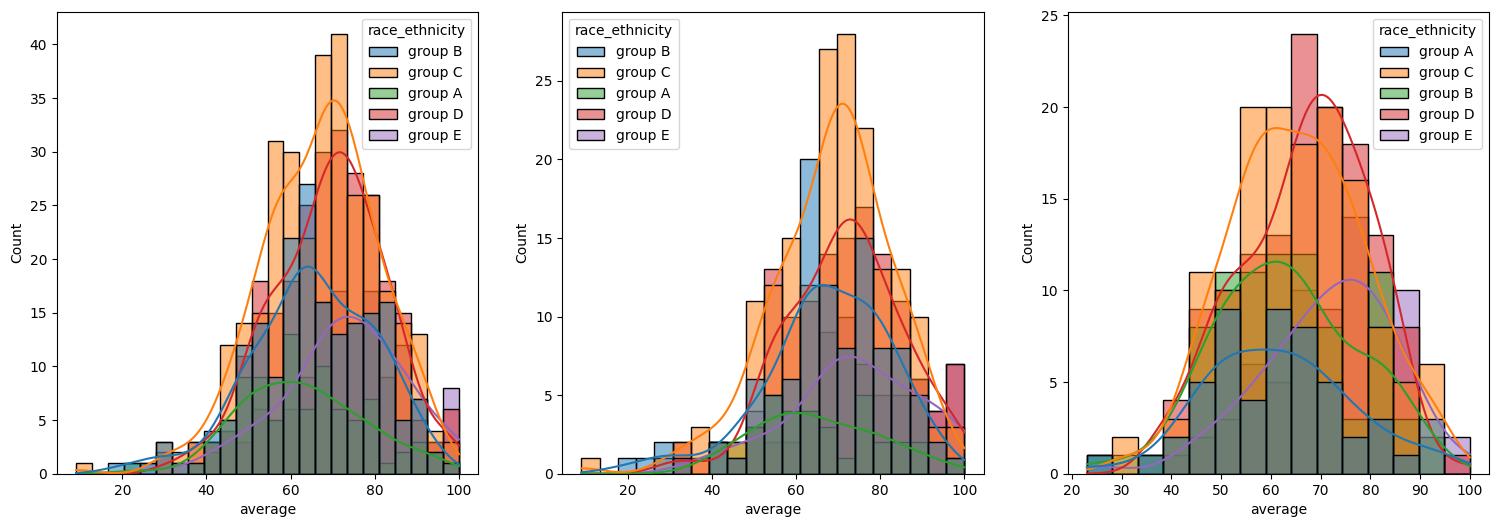

In [88]:
#not very significant on childs education
fig, axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Max score of students in all three subjects

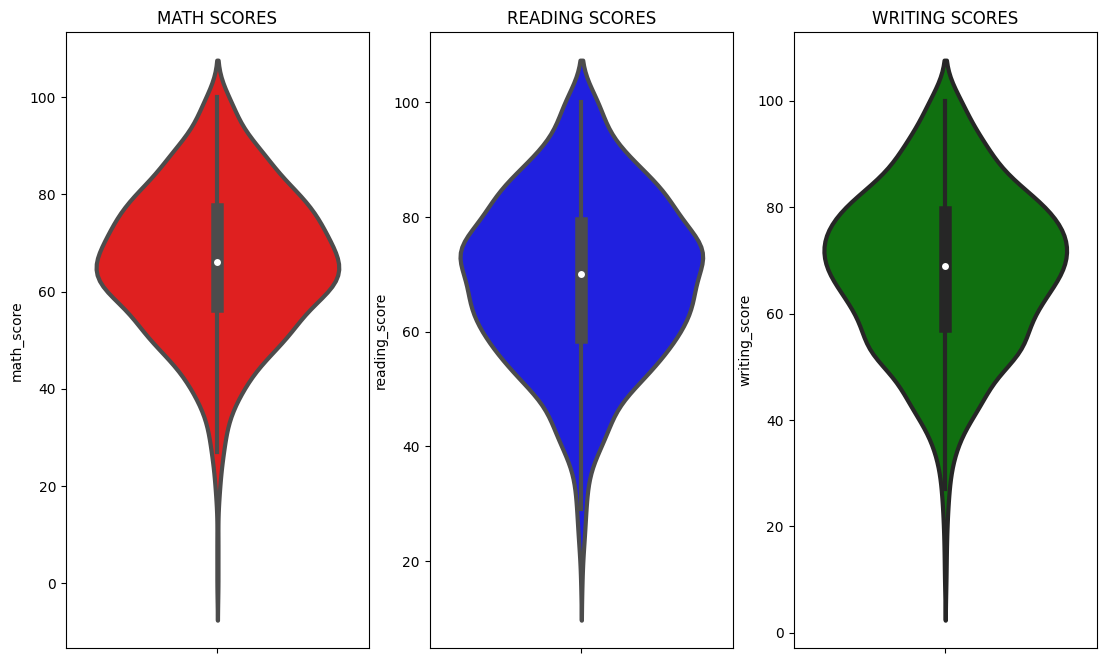

In [89]:
# most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='blue',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='green',linewidth=3)
plt.show()

Multivariate analysis using pieplot

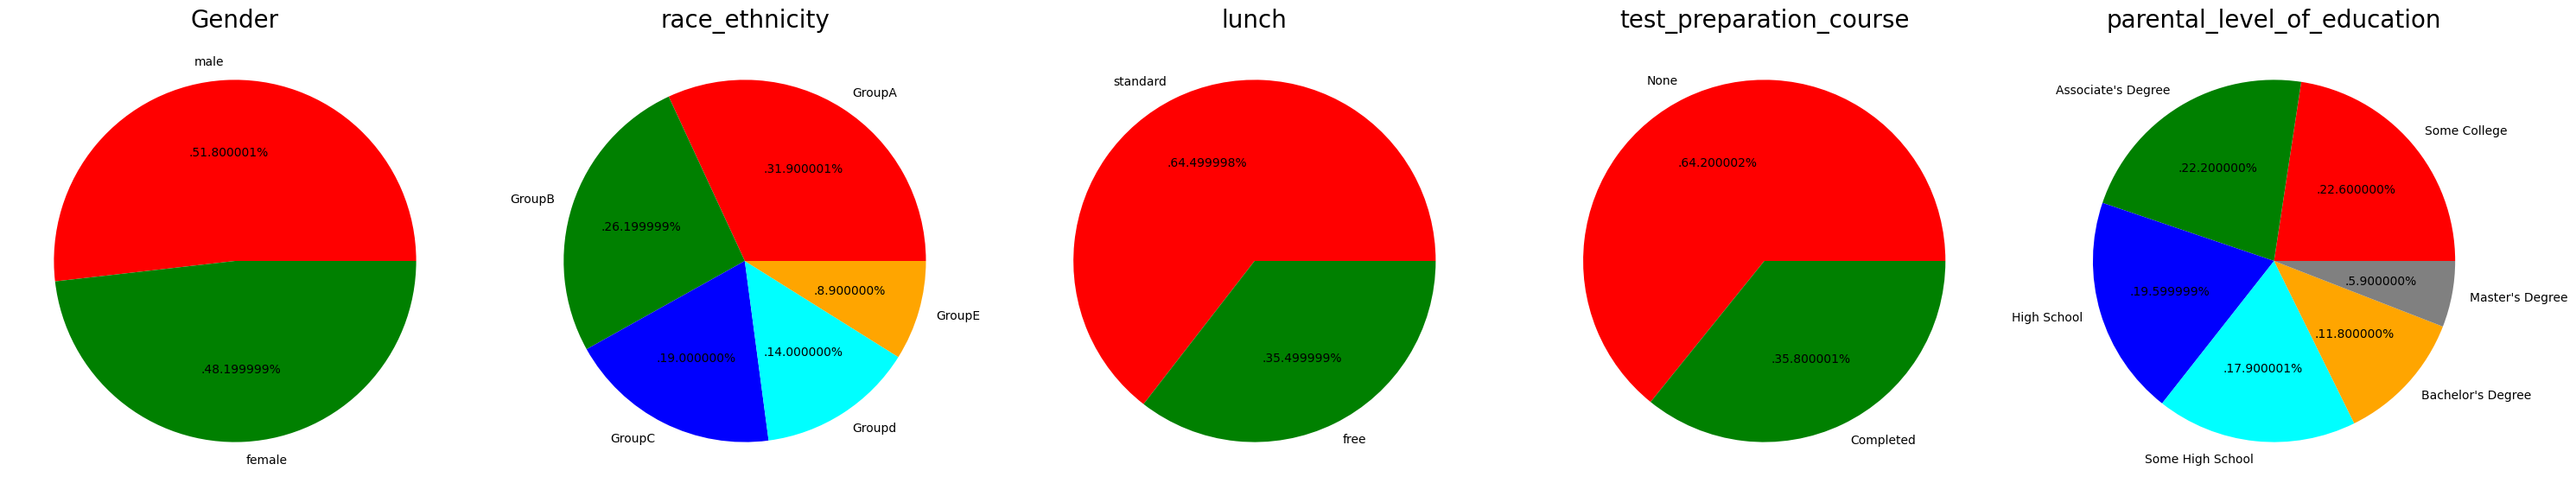

In [90]:
'''
Number of Male and Female students is almost equal
Number students are greatest in Group C
Number of students who have standard lunch are greater
Number of students who have not enrolled in any test preparation course is greater
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"
'''

plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
label=['male','female']
color=['red','green']
plt.pie(size,colors=color,labels=label,autopct = '.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
label=['GroupA','GroupB','GroupC','Groupd','GroupE']
color=['red','green','blue','cyan','orange']
plt.pie(size,colors=color,labels=label,autopct = '.%2f%%')
plt.title('race_ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
label=['standard','free']
color=['red','green']
plt.pie(size,colors=color,labels=label,autopct = '.%2f%%')
plt.title('lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
label=['None','Completed']
color=['red','green']
plt.pie(size,colors=color,labels=label,autopct = '.%2f%%')
plt.title('test_preparation_course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
label=['Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"]
color=['red','green','blue','cyan','orange','grey']
plt.pie(size,colors=color,labels=label,autopct = '.%2f%%')
plt.title('parental_level_of_education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Featurewise Visualization

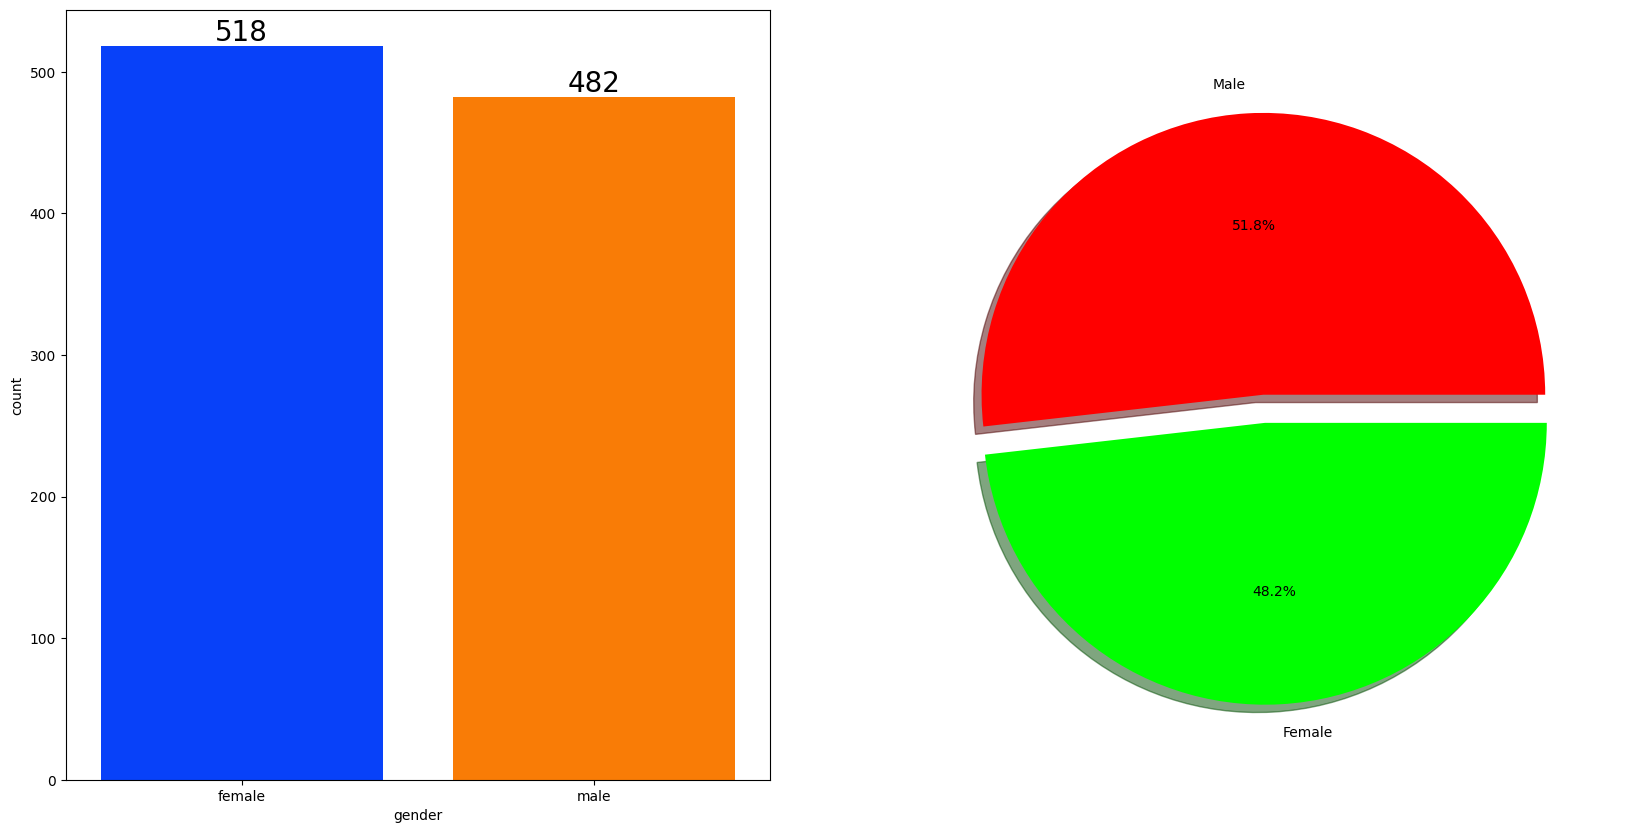

In [91]:
'''
Analyse gender
How is distribution of Gender ?
Is gender has any impact on student's performance ?
'''
fig, axs=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=axs[0],saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#FF0000', '#00FF00'])

plt.show()


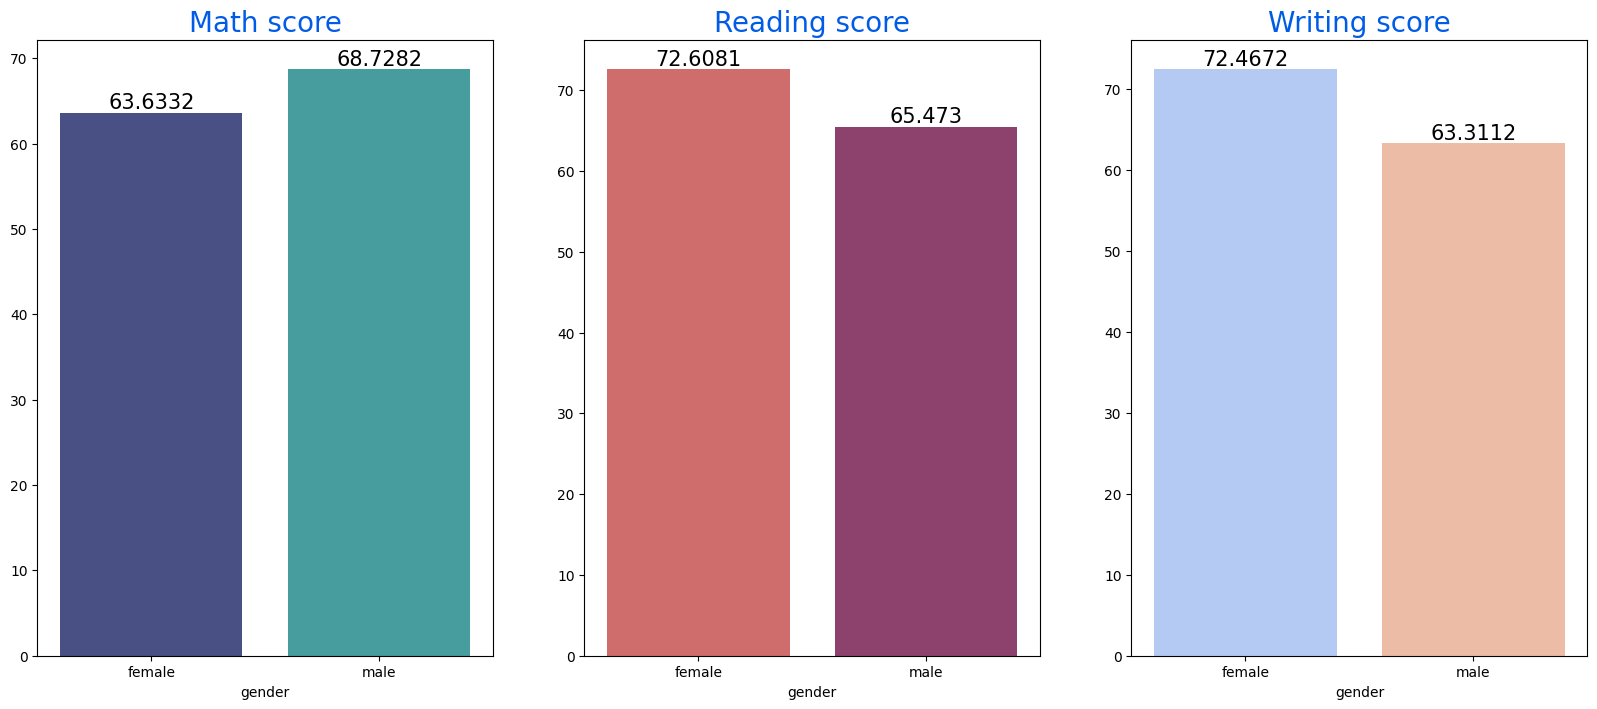

In [99]:
Group_data1=df.groupby('gender')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data1['math_score'].mean().index,y=Group_data1['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data1['reading_score'].mean().index,y=Group_data1['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data1['writing_score'].mean().index,y=Group_data1['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Race/Ethnicity

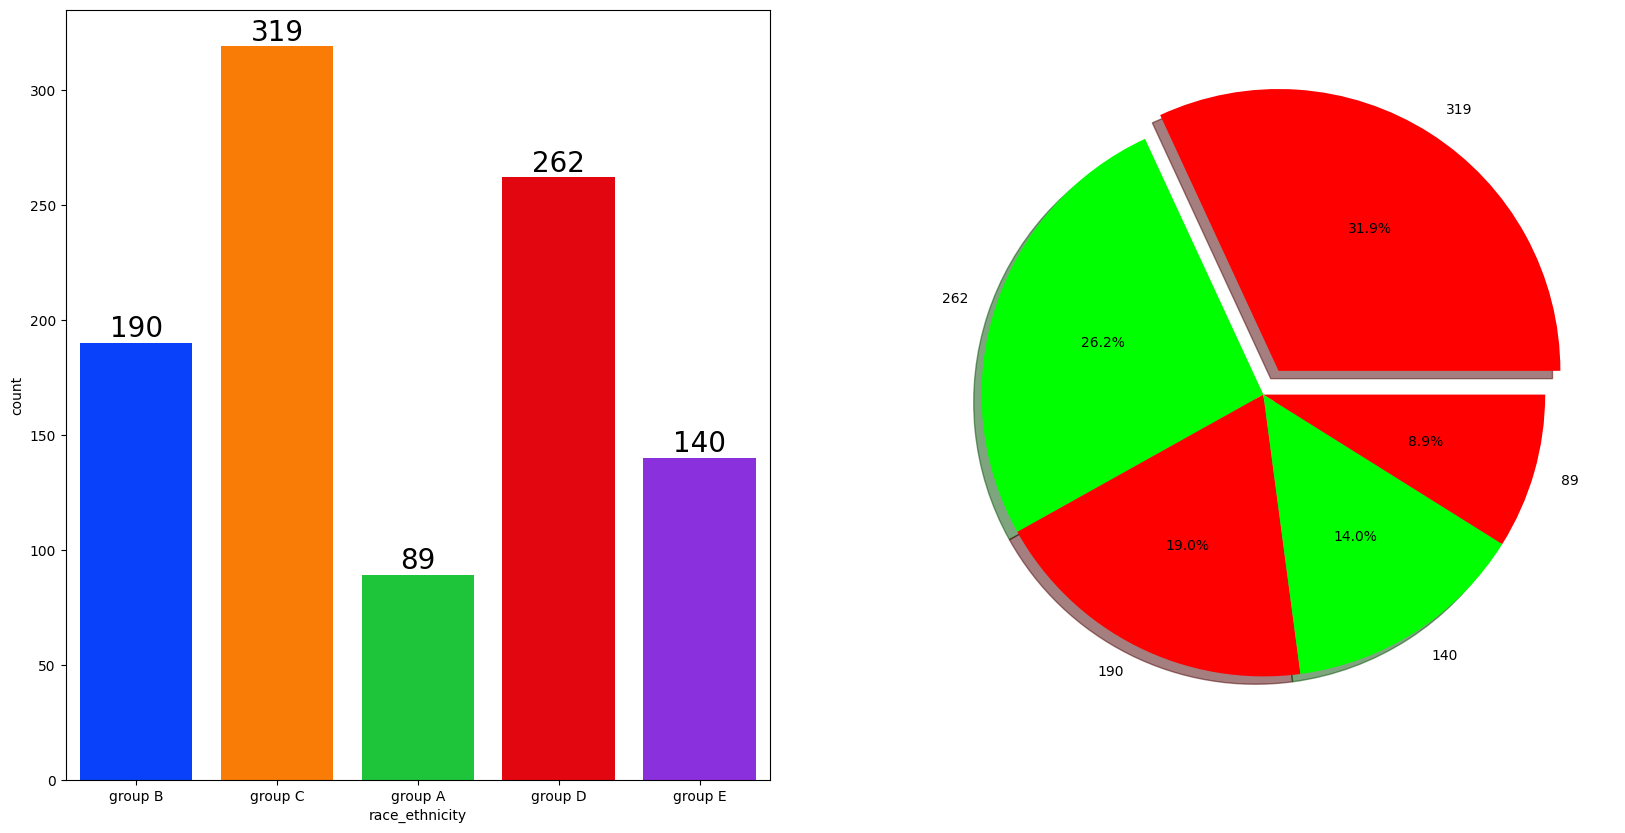

In [103]:
fig, axs=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=axs[0],saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts(), explode=[ 0.1,0,0,0,0], autopct='%1.1f%%', shadow=True, colors=['#FF0000', '#00FF00'])

plt.show()

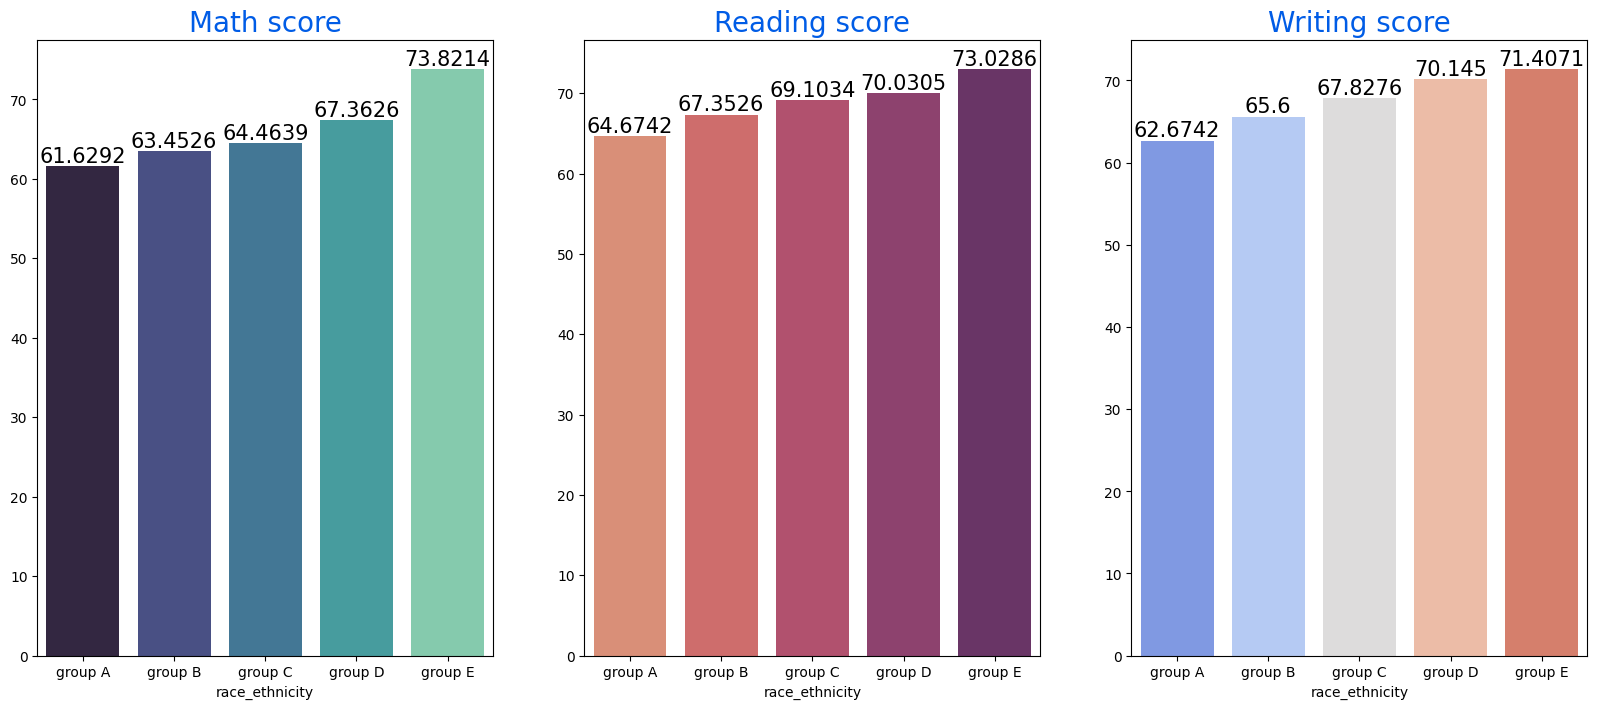

In [96]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Parenatal level of education

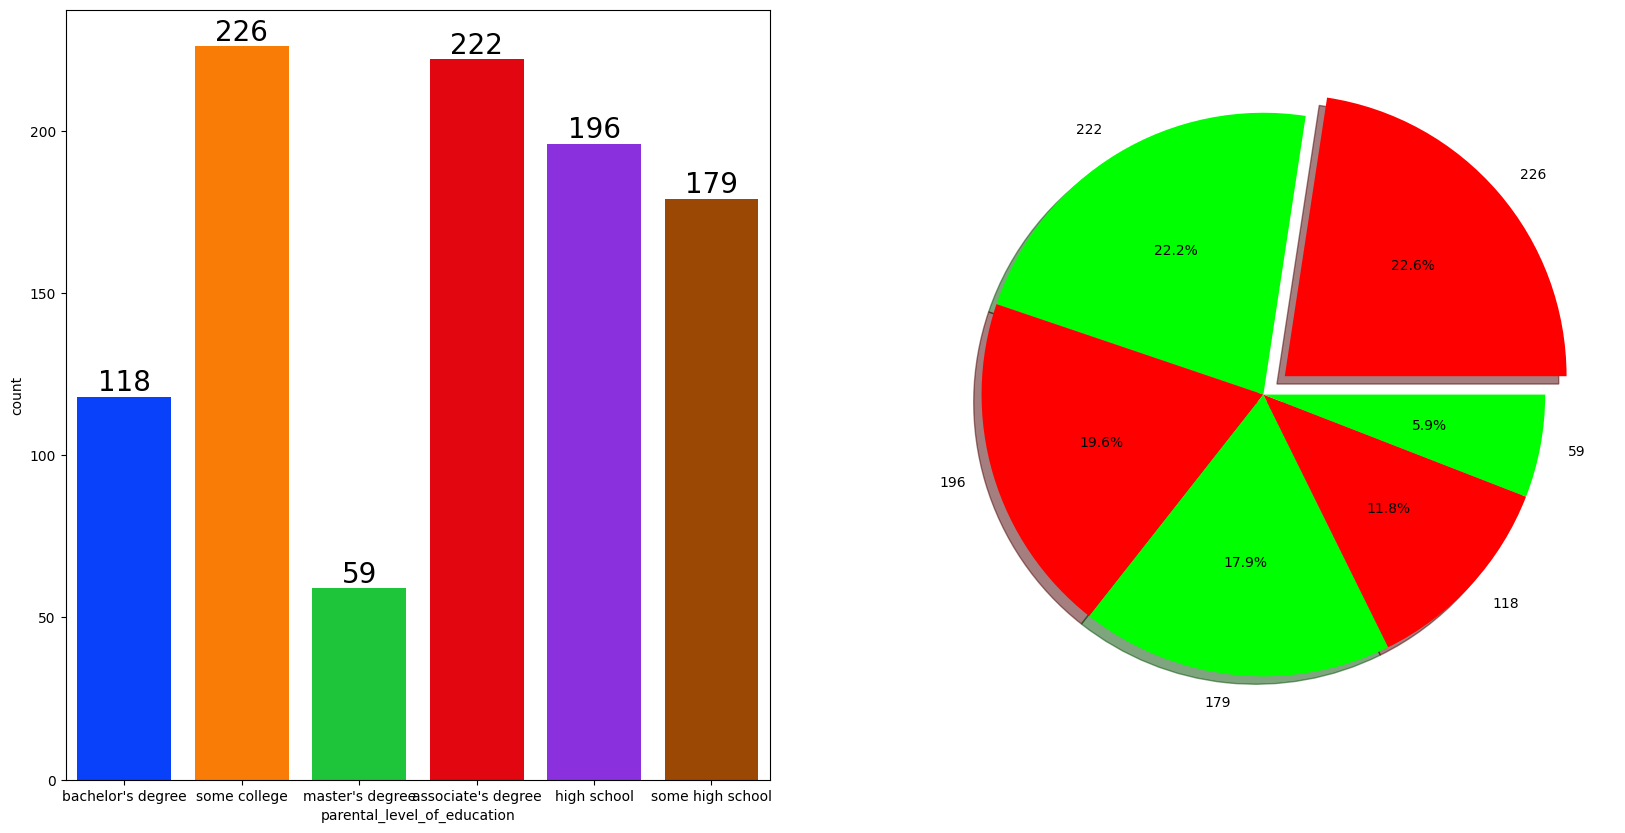

In [107]:
fig, axs=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',ax=axs[0],saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=20)
plt.pie(x=df['parental_level_of_education'].value_counts(), labels=df['parental_level_of_education'].value_counts(), explode=[ 0.1,0,0,0,0,0], autopct='%1.1f%%', shadow=True, colors=['#FF0000', '#00FF00'])

plt.show()

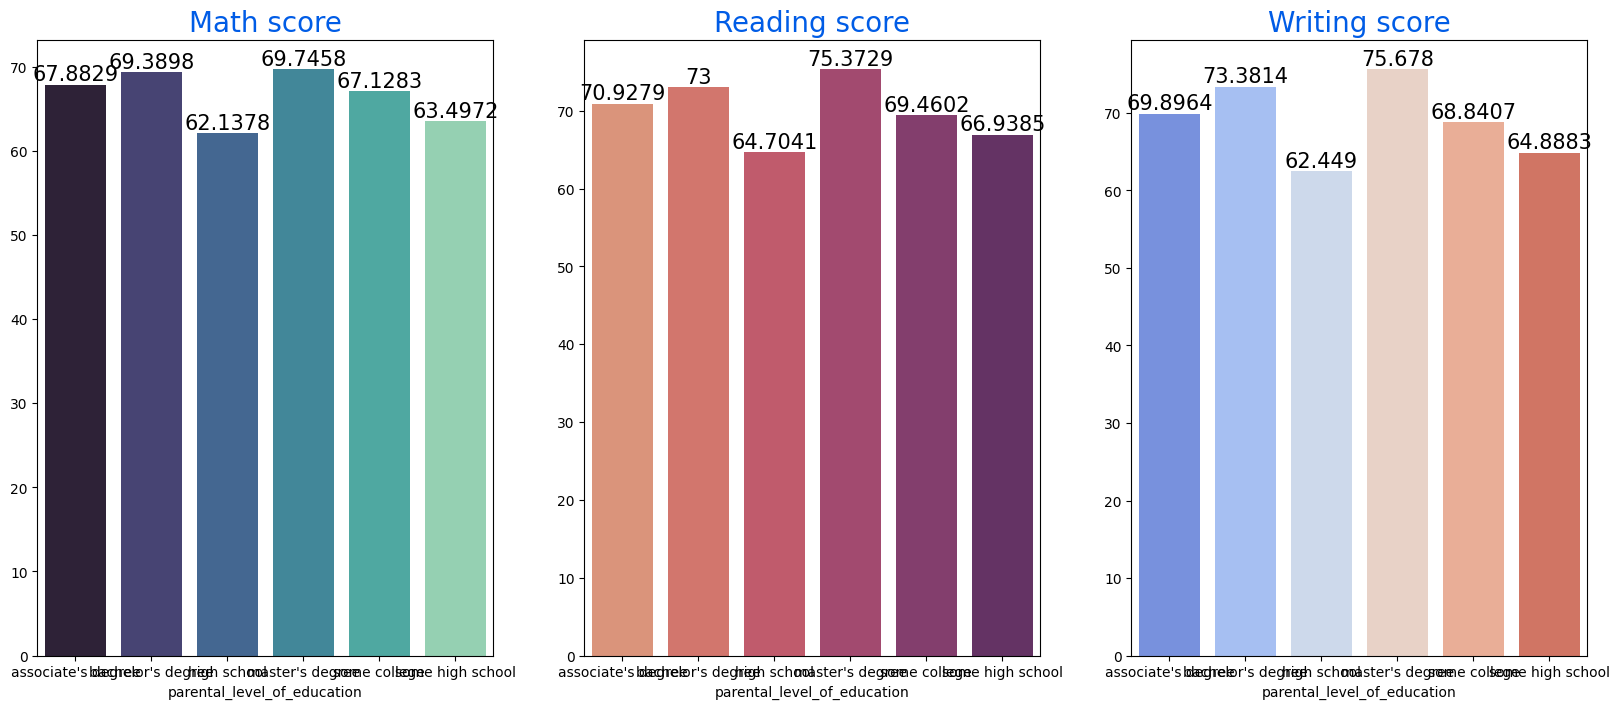

In [108]:
Group_data2=df.groupby('parental_level_of_education')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

lunch

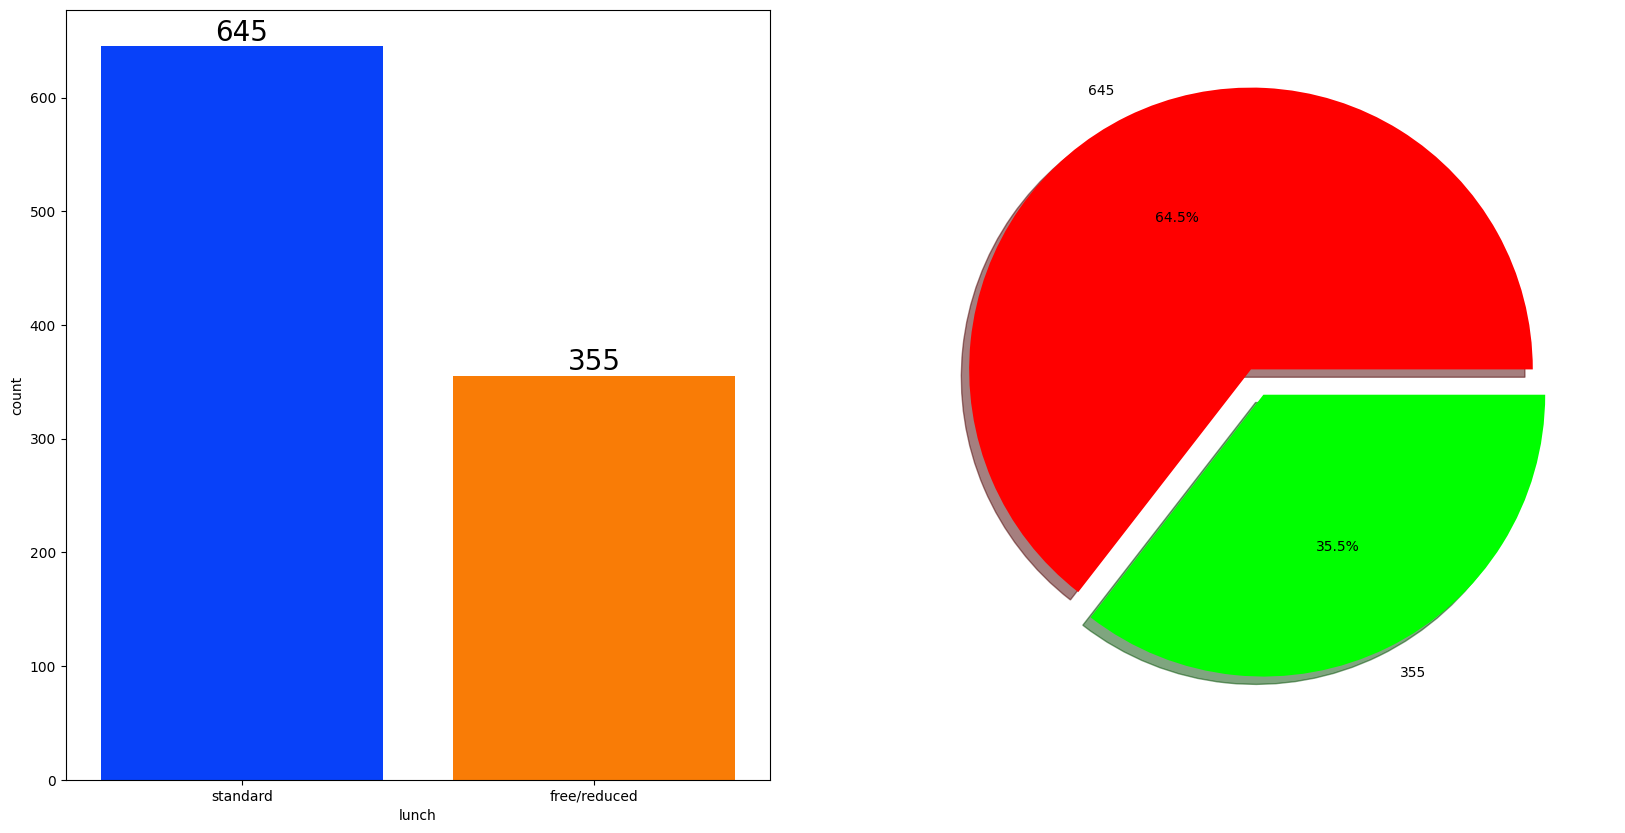

In [109]:
fig, axs=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['lunch'],data=df,palette='bright',ax=axs[0],saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container,color='black',size=20)
plt.pie(x=df['lunch'].value_counts(), labels=df['lunch'].value_counts(), explode=[ 0.1,0], autopct='%1.1f%%', shadow=True, colors=['#FF0000', '#00FF00'])

plt.show()

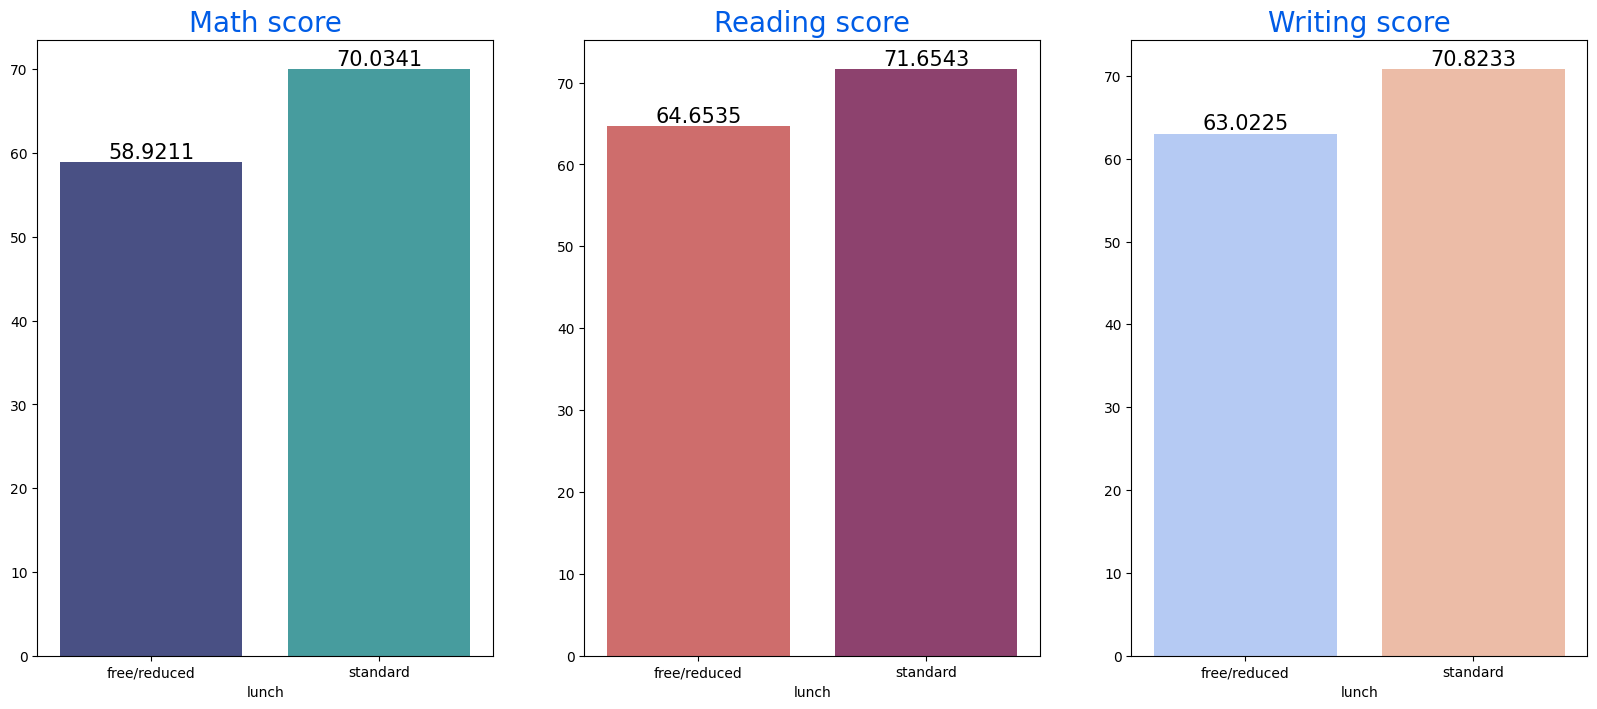

In [110]:
Group_data2=df.groupby('lunch')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Check for outliers

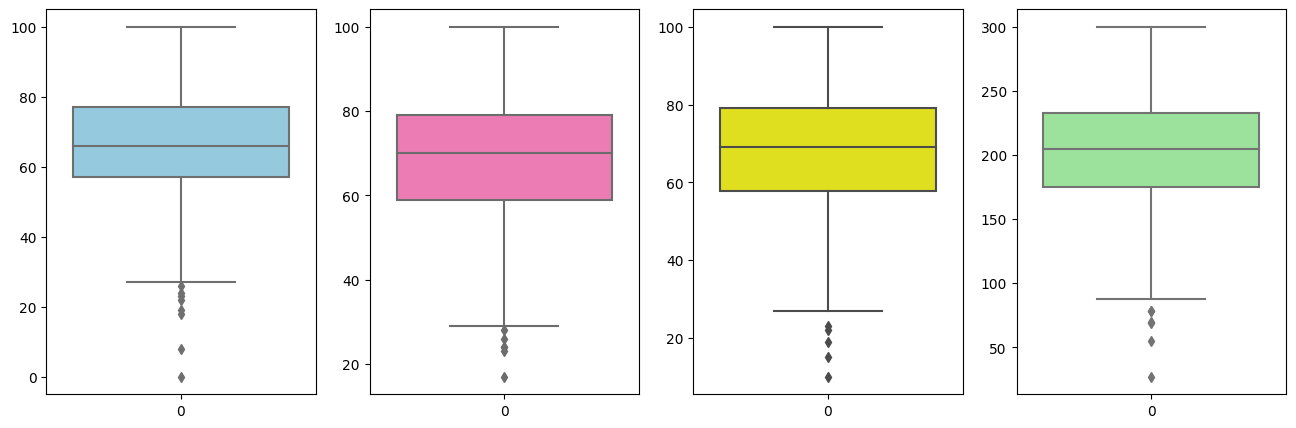

In [111]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['total'],color='lightgreen')
plt.show()

multivariate analysis

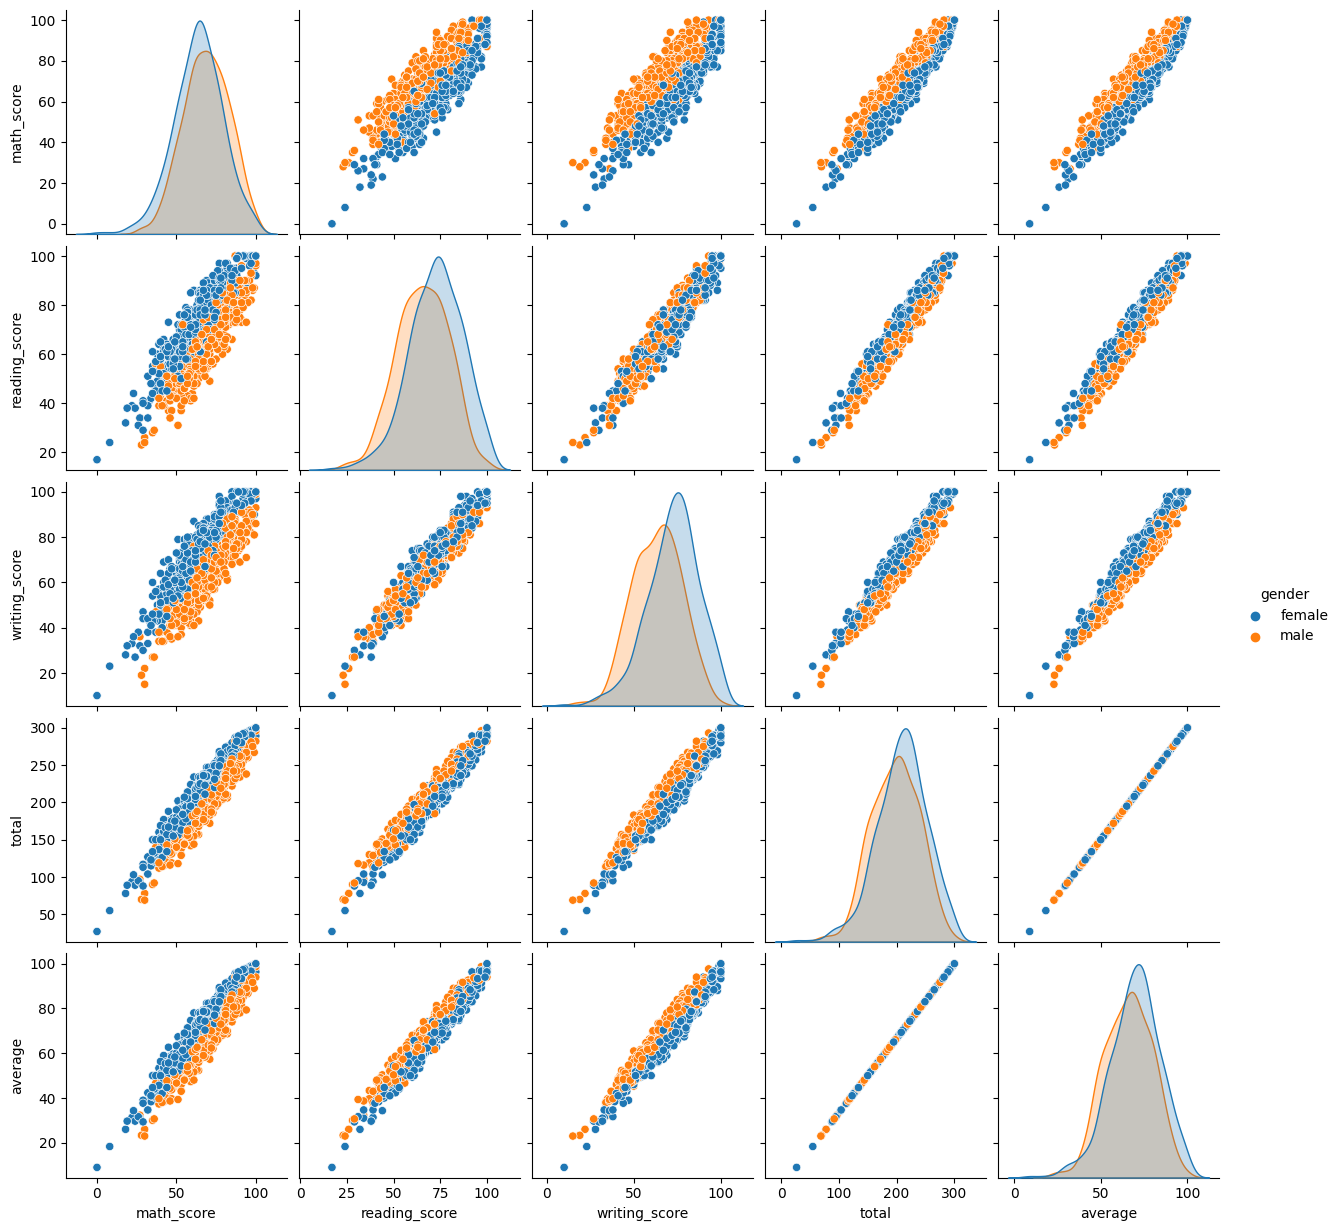

In [112]:
sns.pairplot(df,hue = 'gender')
plt.show()